## 1. Defining the question

### a) Specifying the question
Build a model that predicts whether or not a passenger survived the titanic catastrophe

###b) Defining the Metrics for success
i. To build a model that predicts whether or not a passenger survived the titanic with an f1 score of 80+ %


ii. To identfy the most important features in predicting a passengers survival chances

iii. To identify the ideal training_test split size for the best model accuracy.

### c) Understanding the context
The RMS Titanic was a British ship that sank in the North Atlantic Ocean during her maiden voyage from Southampton to New York. At the time, the Titanic was the largest ship a float and it is no surprise that the tragedy resulted in the death of more than 1500 people out of a total 2,224 passengers and crew members. Some of the factors that contributed to the tragedy involved the weak maritime safety measures that were implemented at the time which meant that the Titanic was permitted to sail while it only carried enough life boats for about 1,178 people. Although much has been done to strengthen the safety regulations of such large ships, the disaster can provide a lesson on some of the key factors that helped the survivors which can be used in future to structure better evacuation plans and mitigate loss of lives.

### d) Recording the experimental design
For this experiemnt, I will:
*   Load and preview the data set
*   Prepare the data
*   Perform Exploratory Data Analysis i.e Univariate, Bivariate and Multivariate analysis 
*   Train the model (K-Nearest-Neighbors)
*   Evaluate and optimize the model (Cross-validation & Feature Reduction)
*   Draw conclusions and make recommendations

### e) Data Relevance
The data is relevant as it contains passenger information as they are are related to the Titanic which includes their survival status, the passenger class, gender, age, siblings aboard, parents aboard, the fare prices, cabin, and their port of embarkation.

## 2. Reading the data

In [66]:
# Import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
# Read csv file
titanic =  pd.read_csv('titanic.csv')

# Preview first five rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# Preview last five rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [69]:
titanic.shape

(891, 12)

The data set has 891 rows and 12 columns

In [70]:
# Check information about the data set
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It is evident that the rows are uneven across different columns while the data set has  both numeric and categorical data types.

## 3. Tidy the data set

In [71]:
# Check for duplicates
titanic.duplicated().sum()

0

There are no duplicate values

In [72]:
# Check for null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three columns, namely 'Age', 'Cabin' and 'Embarked' with null values.

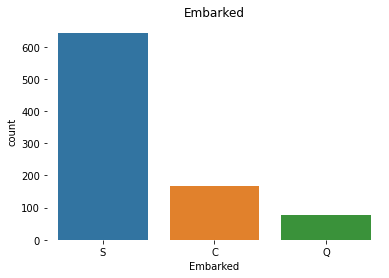

In [73]:
# Examine null 'Embarked' values
sns.countplot(x='Embarked', data=titanic)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Embarked')
plt.show()

Since we are dealing with categorical data, I will fill the null values with the mode (in this case 'S').

In [74]:
# Filling null 'Embarked' values
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

I will fill the null values in 'Cabin' column with unknown since I could not find any additional information about how the cabins were assigned to passengers. 

In [75]:
# Filling null 'Cabin' values
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

In dealing with the null values in the 'Age' column, I will split the data set using passenger class which is a good estimator of age. 

In [76]:
# Group the data set according to class
class_1 = titanic.groupby('Pclass').get_group(1)
class_2 = titanic.groupby('Pclass').get_group(2)
class_3 = titanic.groupby('Pclass').get_group(3)


print('1st class mean age: ',class_1.Age.mean())
print('2nd class mean age: ',class_2.Age.mean())
print('3rd class mean age: ',class_3.Age.mean())

1st class mean age:  38.233440860215055
2nd class mean age:  29.87763005780347
3rd class mean age:  25.14061971830986


According to the average ages, the older a passenger is, the more likely they are to pay for the more expensive classes. COnsequently, we can fill the missing values in the 'Age' columns with the average age per class.

In [77]:
# Fill null values with respective mean ages
class_1['Age'] = class_1['Age'].fillna(round(class_1.Age.mean()))
class_2['Age'] = class_2['Age'].fillna(round(class_2.Age.mean()))
class_3['Age'] = class_3['Age'].fillna(round(class_3.Age.mean()))

# Concatenate data sets 
titanic_clean = pd.concat([class_1, class_2, class_3])
titanic_clean.shape

(891, 12)

In [78]:
# Check data set 
titanic_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All the null values have been successfully dealt with.

In [79]:
# Preview first five rows
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


While examining the name column, we can extract name titles such as Mrs, Mr, Miss which could add further information to the current data set. Since the passenger names are of little value, we will drop them from the data set.


In [80]:
# Split name column into 'name' and 'title'
titanic_clean[['name', 'title']] = titanic_clean.Name.str.split(',', expand=True)

# Drop the name columns
titanic_clean = titanic_clean.drop(['Name', 'name'], 1)

In [81]:
# Split title column and retain title
titanic_clean['Title'] = titanic_clean.title.str.split('.', expand=True)[0]

# Drop the title column
titanic_clean = titanic_clean.drop(['title'], 1)
titanic_clean = titanic_clean.sort_index(axis=0, ascending=True)
clean_copy = titanic_clean.copy()
titanic_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,Unknown,S,Mr


Before we begin modelling, we will create dummy variables for all the categorical columns aside from the 'Cabin' which had too many missing values and 'Ticket' which does not inform a person's survival chances. First, I will reduce the cardinality of the 'Title' column.

In [82]:
# Check unique values and their counts
titanic_clean['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Capt              1
 Jonkheer          1
 Mme               1
 Sir               1
 the Countess      1
 Ms                1
 Lady              1
 Don               1
Name: Title, dtype: int64

In [83]:
# Rename the least common titles to 'other'
titanic_clean.replace(to_replace=[' Don', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], value = 'Other', inplace=True)
titanic_clean.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'Other', ' Rev', ' Dr'],
      dtype=object)

I will create dummy variables for the categorical columns to make them useable in modelling.

In [84]:
# Create dummy variables for 'Pclass' and 'Embarked'
titanic_clean['Sex'] = titanic_clean['Sex'].replace({'female':1, 'male':0})
titanic_clean['Embarked'] = titanic_clean['Embarked'].replace({'C':0, 'Q':1, 'S':2})
titanic_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,Unknown,2,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,2,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,Unknown,2,Mr


In [85]:
# Get dummies for 'Title' column
dummies = pd.get_dummies(titanic_clean['Title'], drop_first=True)

# Concatenate data sets
titanic_clean = pd.concat([titanic_clean, dummies], axis=1)

# Drop 'Title' column
titanic_clean = titanic_clean.drop('Title', 1)
titanic_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Rev,Other
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,Unknown,2,0,0,1,0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,1,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2,0,1,0,0,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,2,0,0,0,1,0,0
4,5,0,3,0,35.0,0,0,373450,8.0500,Unknown,2,0,0,1,0,0,0


## Exploratory Data Analysis

### Univariate analysis

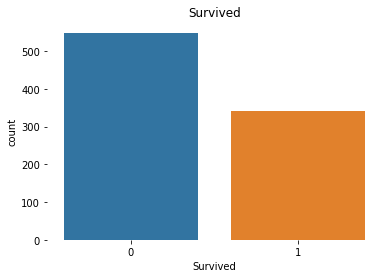

In [86]:
# check survivors
sns.countplot(x='Survived', data=clean_copy)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Survived')
plt.show()

It is evident that more passengers died in the catastrophe.

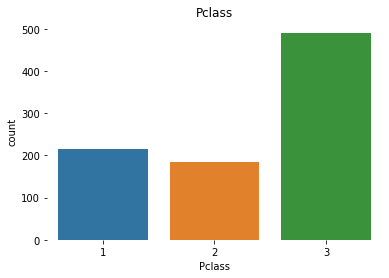

In [87]:
# check passenger classes
sns.countplot(x='Pclass', data=clean_copy)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Pclass')
plt.show()

Passengers in the 3rd class comprise the largest proportion of passengers in the titanic while the 2nd class had least passengers.

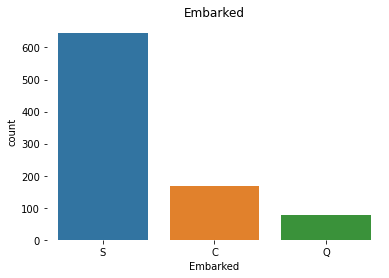

In [88]:
# check port passenger embarked 
sns.countplot(x='Embarked', data=clean_copy)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Embarked')
plt.show()

A majority of the passengers embarked from the Southampton port while Queenstown had the least passengers.

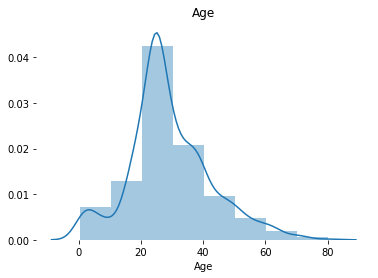

In [89]:
# Check Age distribution
sns.distplot(clean_copy['Age'], hist=True, kde=True, bins=8)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Age')
plt.show()

Most of the passengers on the titanic were aged between 20 and 30 years. The oldest passenger was 80 years old while the youngest was roughly 4 months old.

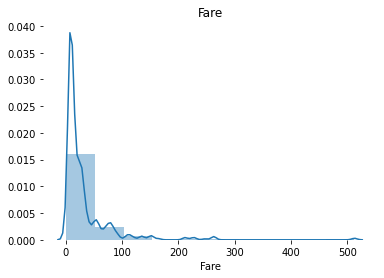

In [90]:
# Check Fare distribution
sns.distplot(clean_copy['Fare'], hist=True, kde=True, bins=10)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Fare')
plt.show()

A majority of the passengers paid between 0 and 50 dollars. The most expensive fare paid was 512 dollars while the in some cases, no fare was paid.

### Bivariate Analysis

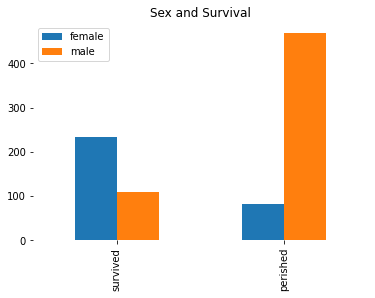

In [91]:
survived = clean_copy.loc[clean_copy['Survived']==1, :]['Sex'].value_counts()
perished = clean_copy.loc[clean_copy['Survived']==0, :]['Sex'].value_counts()
df_plot  = pd.DataFrame([survived, perished])
df_plot.index=['survived','perished']

# Plot
df_plot.plot(kind='bar',stacked=False, title='Sex and Survival')
sns.despine(top=True, left=True, bottom=True, right=True)

Of those who survived the Titanic, a majority were female while a majority of those that perished were male suggesting that females could have been given priority when assigning the limited life boats. 

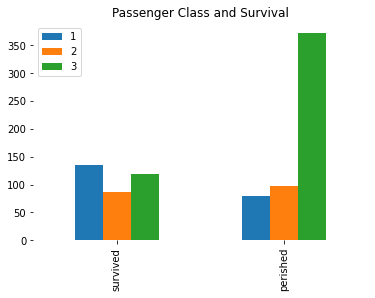

In [92]:
survived = clean_copy.loc[clean_copy['Survived']==1, :]['Pclass'].value_counts()
perished = clean_copy.loc[clean_copy['Survived']==0, :]['Pclass'].value_counts()
df_plot  = pd.DataFrame([survived, perished])
df_plot.index=['survived','perished']

# Plot
df_plot.plot(kind='bar',stacked=False, title='Passenger Class and Survival')
sns.despine(top=True, left=True, bottom=True, right=True)

With regards to classes, a majority of the survivors were from the 1st class while a majority of those who perished were from the 3rd class. Since passenger classes were dependent on the fare a passenger paid, it is likely that passengers who paid the highest fares had first priority when occupying lifeboats. 

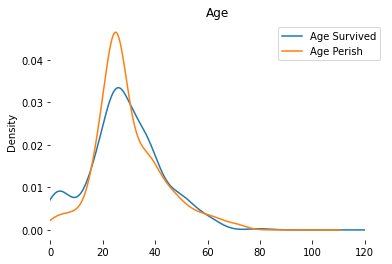

In [93]:
# Plot histograms for Titanic passengers
perished = clean_copy.groupby(by='Survived').get_group(0)
survived = clean_copy.groupby(by='Survived').get_group(1)

survived['Age'].plot.kde(label='Age Survived', legend=True)
perished['Age'].plot.kde(label='Age Perish', legend=True)
plt.title('Age')
plt.xlim(left=0)
sns.despine(left=True, bottom=True)
plt.show()

This plot indicates that there was no significant difference in the average age of passengers who died although it is evident that more passengers perished as evidenced by the high peak.

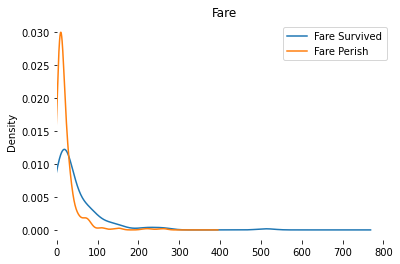

In [94]:
survived['Fare'].plot.kde(label='Fare Survived', legend=True)
perished['Fare'].plot.kde(label='Fare Perish', legend=True)
plt.xlim(left=0)
plt.title('Fare')
sns.despine(left=True, bottom=True)
plt.show()

The high peak indicates that more passengers who paid between 0 and 50 dollars perished compared to the passengers who paid more than 400 dollars, none of who perished. This was also evidenced by the difference in survivivors across different classes.

## Modelling


### 80-20 split

In [95]:
# Assign the target and  features
X = titanic_clean.drop(['PassengerId', 'Ticket', 'Cabin', 'Survived'], 1)
y = titanic_clean['Survived']

In [96]:
# Split the data set into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In the spli, I specify a test size of 20%. Additionally, I will also scale the data due to the positive skewness evidenced by the passengers age and fare distribution.

In [97]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
# Make predictions
y_pred = classifier.predict(X_test)

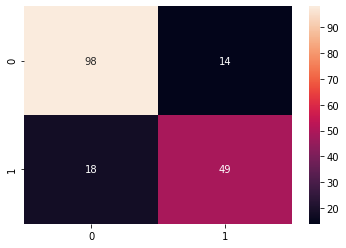



              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.73      0.75        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [100]:
# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, y_pred))

Precision refers to the accuracy of positive predictions.

Recall refers to the fraction of positives that were correctly classified.

F1 score refers to the percentage of positives that were correctly predicted.

Using the f1 scores, my model correctly predicted 86% of those who perished in the disaster and 75% of those who survived.

### Perform cross validation

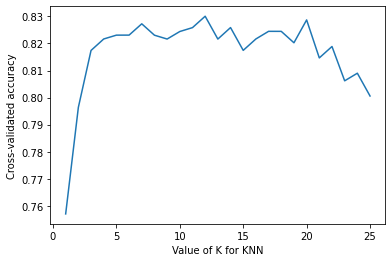

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
# It’s 5 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
  k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

Using a 5-fold cross-validation technique to find the best value of 'k', the cross-validated accuracy plot indicates that the best value is 12.

In [102]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 12, 'weights': 'uniform'}


The grid search confirms the best value of k as 12 while it identfies 'uniform' weights as the best parameter.

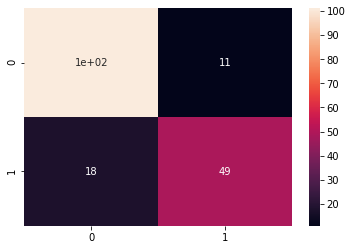



              precision    recall  f1-score   support

           0       0.85      0.90      0.87       112
           1       0.82      0.73      0.77        67

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [103]:
# Use best estimator to make predictions
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, predicted))

Using the best estimator from grid_search, I managed to predict 87% of those who perished in the disaster and 77% of those who survived which is a slight improvement on the previous model.

### Performing feature reduction

#### LDA

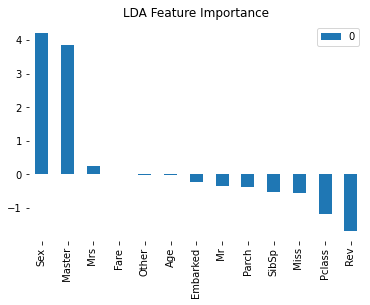

In [104]:
# Feature reduction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_ = lda.fit(X, y)
lda_feat = lda.transform(X)

f_imp = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance = f_imp.sort_values(0, ascending=False)
feature_importance.plot(kind='bar')
plt.title('LDA Feature Importance')
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

The most important features in predicting a passengers survival status is their gender, their title as either Master or Rev, and their class.

In [105]:
# LDA using 1 discriminants
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Varying the linear discriminats did not result in an improvement in the model's performance.

In [106]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 12, 'weights': 'uniform'}


Using grid search, I identified the best parameters as 12 n_neighbors and 'uniform' weights,

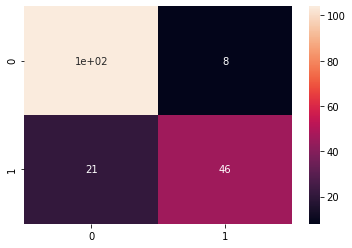



              precision    recall  f1-score   support

           0       0.83      0.93      0.88       112
           1       0.85      0.69      0.76        67

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [107]:
# Use best estimator to make predictions
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, predicted))

Using 1 linear discriminant and the best estimator from grid_search, I managed to correctly predict 88% of those who perished in the disaster and 76% of those who survived which is a slight improvement on the previous model.

#### PCA

In [108]:
# Assign the target and  features
X = titanic_clean.drop(['PassengerId', 'Ticket', 'Cabin', 'Survived'], 1)
y = titanic_clean['Survived']

# Split the data set into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [110]:
explained_variance = pd.DataFrame(range(1,14))
explained_variance['explained_variance'] = pca.explained_variance_ratio_
explained_variance.columns = ['principal_component', 'explained_variance']
explained_variance

,principal_component,explained_variance
0,1,0.232405
1,2,0.161745
2,3,0.117666
3,4,0.100715
4,5,0.079466
5,6,0.076862
6,7,0.070012
7,8,0.056624
8,9,0.041400
9,10,0.037354


In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

I attained the best model performance using 9 principal components

In [112]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 12, 'weights': 'uniform'}


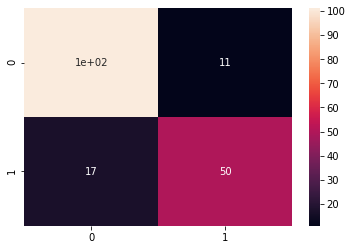



              precision    recall  f1-score   support

           0       0.86      0.90      0.88       112
           1       0.82      0.75      0.78        67

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [113]:
# Use best estimator to make predictions
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, predicted))

Using 9 principal component and the best estimator from grid_search, I managed to correctly predict 88% of those who perished in the disaster and 78% of those who survived which is a slight improvement on the LDA model as it has a higher f1 score for survivors.

### 70-30 split

In [114]:
# Split the data set into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

I specify a test size of 30% and scale the data due to the skewed features.

In [115]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

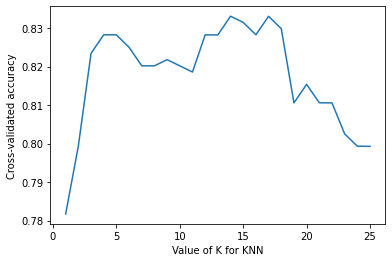

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
# It’s 10 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
  k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

With a split size of 30%, the best value of k is 14.

In [117]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 14, 'weights': 'uniform'}


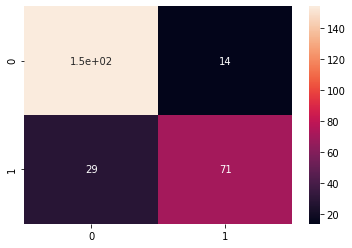



              precision    recall  f1-score   support

           0       0.84      0.92      0.88       168
           1       0.84      0.71      0.77       100

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



In [118]:
# Use best estimator to make predictions
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, predicted))

Judging by the f1 scores, my model correctly predict 88% of those who perished in the disaster and 77% of those who survived.

### Performing Feature Reduction

#### LDA

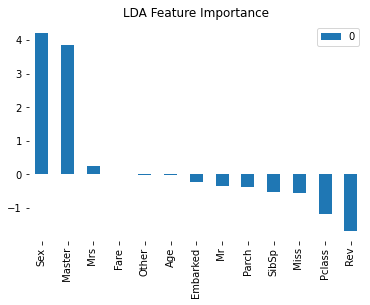

In [119]:
# Feature reduction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_ = lda.fit(X, y)
lda_feat = lda.transform(X)

f_imp = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance = f_imp.sort_values(0, ascending=False)
feature_importance.plot(kind='bar')
plt.title('LDA Feature Importance')
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

As was expected, the difference in split size does not affect the importance of the different features.

In [120]:
# LDA using 1 discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

I attained the best performance using 1 linear discriminant

In [121]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 13, 'weights': 'uniform'}


The best parameter value of k is 13 while the weights is 'uniform'.

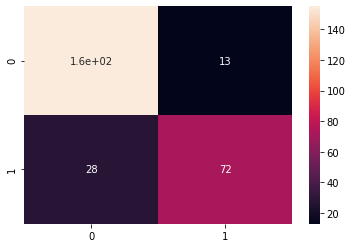



              precision    recall  f1-score   support

           0       0.85      0.92      0.88       168
           1       0.85      0.72      0.78       100

    accuracy                           0.85       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.85      0.84       268



In [122]:
# Use best estimator to make predictions
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, predicted))

Using 1 linear discriminant and the best estimator from grid_search, I managed to correctly predict 88% of those who perished in the disaster and 78% of those who survived. Although the f1 scores are very similar to previous model, this model has a slightly higher accuracy.

#### PCA

In [123]:
# Assign the target and  features
X = titanic_clean.drop(['PassengerId', 'Ticket', 'Cabin', 'Survived'], 1)
y = titanic_clean['Survived']

# Split the data set into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [125]:
explained_variance = pd.DataFrame(range(1,14))
explained_variance['explained_variance'] = pca.explained_variance_ratio_
explained_variance.columns = ['principal_component', 'explained_variance']
explained_variance

,principal_component,explained_variance
0,1,0.230617
1,2,0.164346
2,3,0.117388
3,4,0.102461
4,5,0.078759
5,6,0.076212
6,7,0.070075
7,8,0.054556
8,9,0.041040
9,10,0.037894


In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [127]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 14, 'weights': 'uniform'}


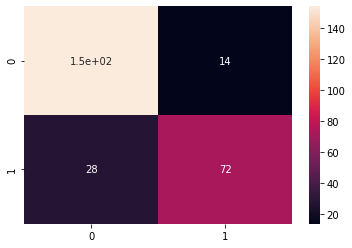



              precision    recall  f1-score   support

           0       0.85      0.92      0.88       168
           1       0.84      0.72      0.77       100

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



In [128]:
# Use best estimator to make predictions
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
plt.show()
print('\n')
print(classification_report(y_test, predicted))

Using 9 principal component and the best estimator from grid_search, I managed to correctly predict 88% of those who perished in the disaster and 77%.

## Summary and Recommendation
The objective of this project was to build a model that predicts whether or not a passenger survived the titanic catastrophe. For this project to be considered a success, its metrics for success included attaining f1 scores that are higher than 80%, identifying the most important features in predicting a passenger’s survival chances, and identifying the best train_test split size for the best model accuracy.

With regards to the prediction models and their F1 scores, I trained the models using an 80-20 split and a 70-30 split. In the 80-20 split, I attained the best performance while implementing PCA for feature reduction and  training the model using 9 principal components which resulted in an f1 score of 0.88 for those who perished and 0.788 for the survivors. In the 70-30 split, I attained the best performance while implementing LDA for feature reduction and training the model using 1 linear discriminant which resulted in an f1 score of 0.88 for the perished and 0.78 for the survivors. Comparing the two split sizes, I would recommend the 70-30 split and using LDA for feature reduction and grid search for model optimization as it is equally better at making predictions while relying on less training data. Regarding the importance of the different features, my models identified gender, a person’s title as either Master or Rev, and a passengers class as having the greatest influence in determining a person’s survival chances.

Examining my metrics for success, the sole failure was that the f1 score for the survivors did not reach the set 80+ % suggesting I should look for more ways to optimize the model.

## Challenging the Solution
To challenge the solution, I could try and create dummy variables for the ‘Cabin’ column which I ignored during modeling due to the large number of missing values. It is arguable that the position of a person’s cabin in the ship could affect how fast they could reach the lifeboats and whether or not they could escape in case the sink started sinking while they were still inside.